In [394]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [395]:
warnings.filterwarnings("ignore")

# Data preprocessing

In [396]:
train_data = pd.read_csv("data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [397]:
train_data = train_data.drop('Name', axis=1)
train_data = train_data.drop('Ticket', axis=1)
train_data = train_data.drop('Cabin', axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [398]:
test_data = pd.read_csv("data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [399]:
test_data = test_data.drop('Name', axis=1)
test_data = test_data.drop('Ticket', axis=1)
test_data = test_data.drop('Cabin', axis=1)
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [400]:
gender_submission = pd.DataFrame(test_data['PassengerId'])

In [401]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [402]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [403]:
test_data.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

<Axes: >

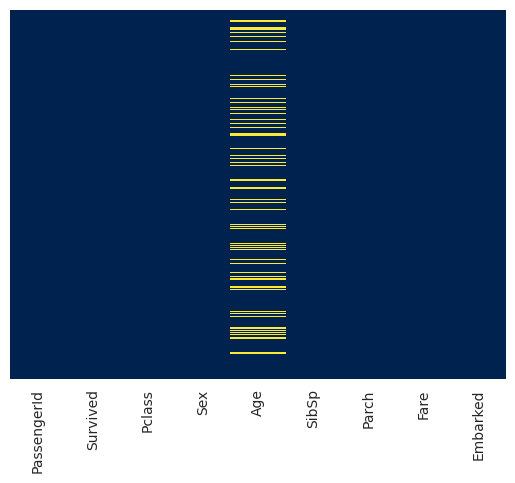

In [404]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='cividis')

<Axes: >

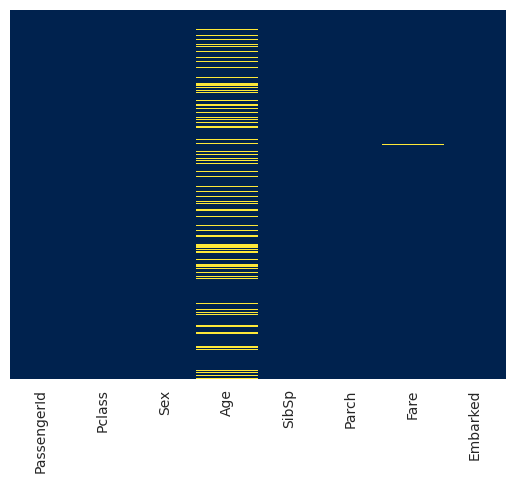

In [405]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='cividis')

<Axes: xlabel='Survived', ylabel='count'>

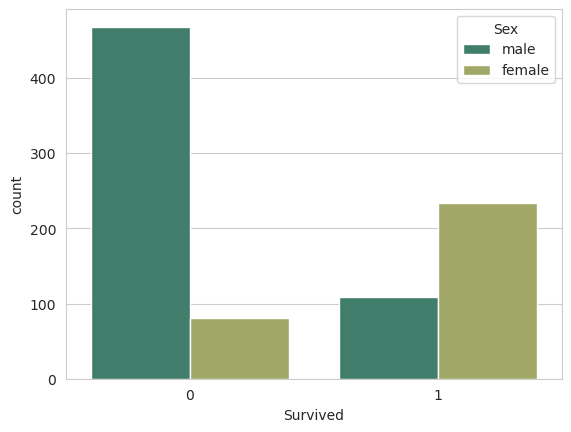

In [406]:
sns.countplot(x='Survived', hue='Sex', data=train_data, palette='gist_earth')

<Axes: >

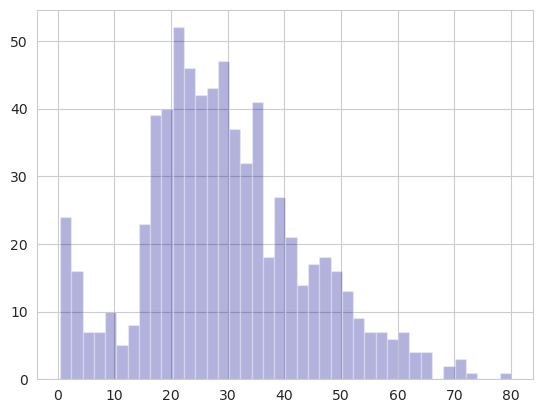

In [407]:
train_data['Age'].hist(bins=40,color='darkblue',alpha=0.3)

<Axes: xlabel='Pclass', ylabel='Age'>

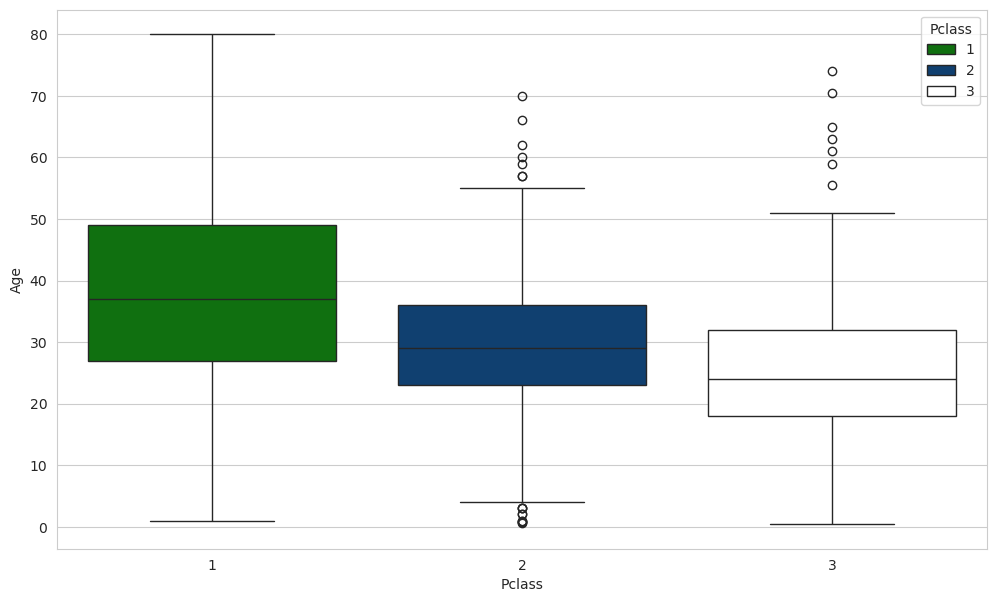

In [408]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train_data, hue = 'Pclass', palette='ocean')

In [409]:
def impute_age(row):
    Age = row['Age']
    Pclass = row['Pclass']
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [410]:
train_data['Age'] = train_data.apply(impute_age, axis=1)

In [411]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [412]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [413]:
train_data['Embarked'].fillna('S', inplace=True)

In [414]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [415]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

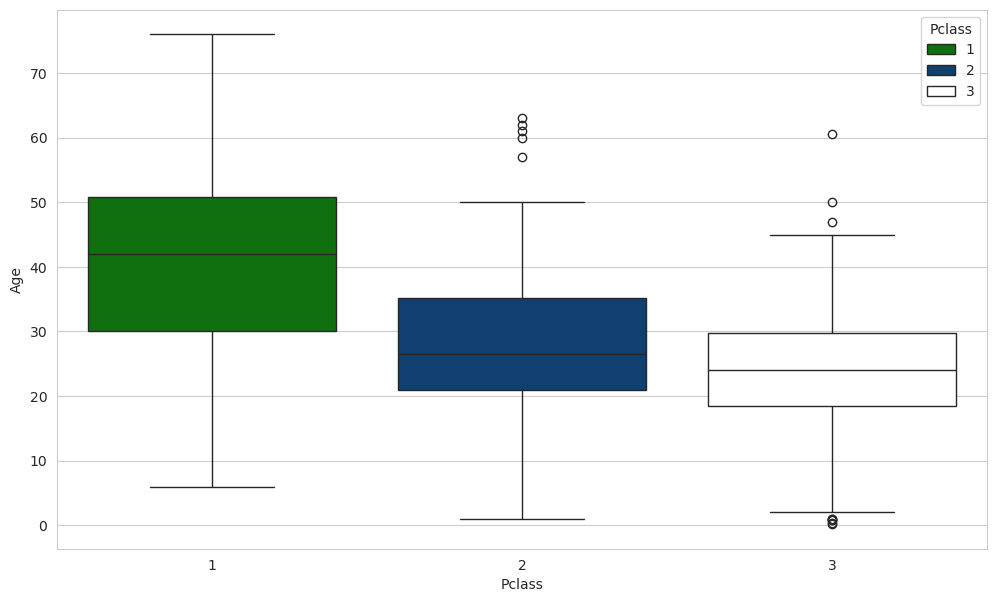

In [416]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=test_data, hue = 'Pclass', palette='ocean')

In [417]:
test_data['Age'] = test_data.apply(impute_age, axis=1)

In [418]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [419]:
test_data['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [420]:
test_data['Fare'].fillna(np.mean(test_data['Fare']), inplace=True)

In [421]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [422]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,24.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


# Encoding the data

In [423]:
X_train = train_data.drop(columns = ['Survived'])
y_train = train_data['Survived']

In [424]:
X_test = test_data
# y_test = test_data['Survived'] # This part does not exist ... yet!

In [425]:
from sklearn.preprocessing import LabelEncoder

labelencoder1 = LabelEncoder()
X_train['Sex'] = labelencoder1.fit_transform(X_train['Sex'])

labelencoder2 = LabelEncoder()
X_test['Sex'] = labelencoder2.fit_transform(X_test['Sex'])

labelencoder3 = LabelEncoder()
X_train['Embarked'] = labelencoder3.fit_transform(X_train['Embarked'])

labelencoder4 = LabelEncoder()
X_test['Embarked'] = labelencoder4.fit_transform(X_test['Embarked'])

# Random Forest Classification

In [426]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [427]:
rfc = RFC(criterion='gini', n_estimators=100, random_state=0, min_samples_leaf=6, min_samples_split=2, max_depth=4, max_features='log2',)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='log2', min_samples_leaf=6,
                       random_state=0)

In [428]:
predict1 = rfc.predict(X_test)

In [429]:
rfc.score(X_train, y_train)

0.8439955106621774

In [430]:
def compare_classes(actual, predicted, names=None):
    '''Function returns a confusion matrix, and overall accuracy given:
            Input:  actual - a list of actual classifications
                    predicted - a list of predicted classifications
                    names (optional) - a list of class names
    '''
    accuracy = sum(actual==predicted)/actual.shape[0]
    
    classes = pd.DataFrame(columns = ['Actual', 'Predicted'])
    classes['Actual'] = actual
    classes['Predicted'] = predicted

    conf_mat = pd.crosstab(classes['Actual'], classes['Predicted'])
    
    if type(names) != type(None):
        conf_mat.index = names
        conf_mat.index.name = 'Actual'
        conf_mat.columns = names
        conf_mat.columns.name = 'Predicted'
    
    print('Accuracy = ' + format(accuracy, '.2f'))
    return conf_mat, accuracy

In [431]:
y_pred = rfc.predict(X_train)
cm,acc = compare_classes(y_train, y_pred)
cm

Accuracy = 0.84


Predicted,0,1
Actual,,
0,509,40
1,99,243


In [432]:
importances = rfc.feature_importances_
importances

array([0.03442315, 0.15421672, 0.53630132, 0.07936208, 0.0357137 ,
       0.01888702, 0.11907345, 0.02202256])

### The third feature (gender) has the highest importance, which makes sense given the fact that the women left the ship first.

# Scaling the data

In [433]:
from sklearn.preprocessing import StandardScaler as SS
ss = SS()
X_train_s = ss.fit_transform(X_train_df)
X_test_s = ss.transform(X_test_df)
X_train_s

array([[-1.73010796,  0.82737724,  0.73769513, ..., -0.47367361,
        -1.24717035,  0.58595414],
       [-1.72622007, -1.56610693, -1.35557354, ..., -0.47367361,
         1.45116508, -1.9423032 ],
       [-1.72233219,  0.82737724, -1.35557354, ..., -0.47367361,
        -0.91880149,  0.58595414],
       ...,
       [ 1.72233219,  0.82737724, -1.35557354, ...,  2.00893337,
         0.36612014,  0.58595414],
       [ 1.72622007, -1.56610693,  0.73769513, ..., -0.47367361,
         0.6802121 , -1.9423032 ],
       [ 1.73010796,  0.82737724,  0.73769513, ..., -0.47367361,
        -1.07584746, -0.67817453]])

### Now we are creating a mini train test k-fold cross validation within the training data given

In [434]:
def do_Kfold(model,X,y,k,scaler = None, random_state = 146):
    
    
    
    from sklearn.model_selection import KFold
    
    kf = KFold(n_splits=k, random_state = random_state, shuffle=True) 
   

    train_scores = [] 
    test_scores = []

    for idxTrain, idxTest in kf.split(X): 
        
        Xtrain = X[idxTrain, :] 
        Xtest = X[idxTest, :] 
        ytrain = y[idxTrain] 
        ytest = y[idxTest] 
        if scaler != None: 
            Xtrain = scaler.fit_transform(Xtrain)
            Xtest = scaler.transform(Xtest) 

        model.fit(Xtrain,ytrain) 

        train_scores.append(model.score(Xtrain,ytrain)) 
        test_scores.append(model.score(Xtest,ytest)) 
        
    return train_scores, test_scores

In [435]:
k = 10
rfc = RFC()
train_scores, test_scores = do_Kfold(rfc, X_train_s, y_train, k, ss)

In [436]:
train_scores

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [437]:
test_scores

[0.8333333333333334,
 0.8089887640449438,
 0.8314606741573034,
 0.8202247191011236,
 0.7752808988764045,
 0.8202247191011236,
 0.797752808988764,
 0.8651685393258427,
 0.8202247191011236,
 0.9101123595505618]

In [438]:
rfc.feature_importances_

array([0.19300156, 0.08668008, 0.23664528, 0.18067923, 0.04070925,
       0.0323196 , 0.19942949, 0.03053552])

### Still the same importances basically

We see that the fourth feature (gender) is the most important as expected.

### Let's optimize some hyperparameters to hopefully help diminish overfitting

In [439]:
from sklearn.model_selection import KFold, GridSearchCV

param_grid = dict(n_estimators=[1,100,500],max_depth = [2,3,4,5],min_samples_split = [2,3,4,5]) #params to test
cv = KFold(n_splits=10, random_state=146, shuffle = True)
grid = GridSearchCV(RFC(random_state = 146), param_grid=param_grid, cv=cv, scoring='accuracy')

#### A single mini train test split within the training data given

In [440]:
from sklearn.model_selection import train_test_split as tts
mini_X_train, mini_X_test, mini_y_train, mini_y_test = tts(X_train_s, y_train, test_size=0.4, random_state = 146) 

In [441]:
grid.fit(mini_X_train, mini_y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=146, shuffle=True),
             estimator=RandomForestClassifier(random_state=146),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [1, 100, 500]},
             scoring='accuracy')

In [442]:
print(f'The best parameters are {grid.best_params_} with a score of {grid.best_score_:.2f}')

The best parameters are {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 100} with a score of 0.82


In [443]:
rfc = RFC(n_estimators = grid.best_params_['max_depth'], max_depth = grid.best_params_['min_samples_split'], min_samples_split = grid.best_params_['n_estimators'])
rfc.fit(mini_X_train, mini_y_train)
print(rfc.score(mini_X_train, mini_y_train))
print(rfc.score(mini_X_test, mini_y_test))

0.8014981273408239
0.7927170868347339


### Let's go back to fitting all of the data

In [444]:
grid.fit(X_train_s, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=146, shuffle=True),
             estimator=RandomForestClassifier(random_state=146),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [1, 100, 500]},
             scoring='accuracy')

In [445]:
print(f'The best parameters are {grid.best_params_} with a score of {grid.best_score_:.2f}')

The best parameters are {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 500} with a score of 0.82


In [446]:
rfc = RFC(n_estimators = grid.best_params_['max_depth'], max_depth = grid.best_params_['min_samples_split'], min_samples_split = grid.best_params_['n_estimators'])
rfc.fit(X_train_s, y_train)
rfc.score(X_train_s, y_train)

0.7418630751964085

In [447]:
rfc = RFC(n_estimators = 500, max_depth = 5, min_samples_split = 5)
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)

0.8608305274971941

In [448]:
predict2 = rfc.predict(X_test)

In [449]:
rfc.feature_importances_

array([0.0634728 , 0.13199656, 0.41721611, 0.09349237, 0.04467586,
       0.03166143, 0.18328496, 0.03419992])

### Let's compare back to the possibly overfit model with no specified parameters

In [450]:
rfc = RFC()
rfc.fit(X_train_s, y_train)
rfc.score(X_train_s, y_train)

1.0

In [451]:
rfc.feature_importances_

array([0.19442713, 0.0833663 , 0.24445458, 0.17538467, 0.04059869,
       0.03418237, 0.19755779, 0.03002847])

# Logistic Regression

In [452]:
from sklearn.linear_model import LogisticRegression as LR
log_reg = LR(solver='liblinear', C=6.0)
log_reg.fit(X_train,y_train)
predict2 = log_reg.predict(X_test)
log_reg.score(X_train, y_train)

0.8058361391694725

# Hyperparameter optimization

In [453]:
from sklearn.preprocessing import StandardScaler
c = np.array(range(2,20))

train=[]
test=[]

k = 10

for C in c:
    log_reg = LR(C=C)
    tr,te = do_Kfold(log_reg,np.array(X_train),y_train,k, SS())
    
    train.append(np.mean(tr))
    test.append(np.mean(te))

In [454]:
train, test

([0.8058369992621441,
  0.8058369992621441,
  0.8058369992621441,
  0.8057123109828425,
  0.8055876227035407,
  0.8055876227035407,
  0.8055876227035407,
  0.8055876227035407,
  0.8055876227035407,
  0.8057123109828425,
  0.8057123109828425,
  0.8057123109828425,
  0.8057123109828425,
  0.8057123109828425,
  0.8057123109828425,
  0.8057123109828425,
  0.8057123109828425,
  0.8057123109828425],
 [0.8002871410736578,
  0.8002871410736578,
  0.8002871410736578,
  0.8002871410736578,
  0.8002871410736578,
  0.8002871410736578,
  0.8002871410736578,
  0.8002871410736578,
  0.8014107365792758,
  0.8014107365792758,
  0.8014107365792758,
  0.8014107365792758,
  0.8014107365792758,
  0.8014107365792758,
  0.8014107365792758,
  0.8014107365792758,
  0.8014107365792758,
  0.8014107365792758])

In [455]:
depth = np.array(range(2,20))

train=[]
test=[]

k = 10

for max_depth in depth:
    rfc = RFC(max_depth = max_depth)
    tr,te = do_Kfold(rfc,np.array(X_train),y_train,k)
    
    train.append(np.mean(tr))
    test.append(np.mean(te))

In [456]:
train

[0.7982291462355346,
 0.827534472184084,
 0.8481103732553759,
 0.8638228087708318,
 0.882279320425528,
 0.9060982064190336,
 0.9295417822484986,
 0.9415132580533683,
 0.9536095778033072,
 0.9628377557977716,
 0.9735623488096239,
 0.9821672410733466,
 0.9922683926886903,
 0.9978798322545697,
 0.9992517146584227,
 0.9997506234413965,
 0.9998753117206982,
 0.9998753117206982]

In [457]:
test

[0.7912609238451934,
 0.8092009987515606,
 0.8238077403245943,
 0.8215605493133584,
 0.8271535580524345,
 0.8237827715355804,
 0.8204494382022471,
 0.8294257178526842,
 0.8181897627965042,
 0.8294132334581773,
 0.826067415730337,
 0.826067415730337,
 0.821585518102372,
 0.8271785268414481,
 0.8204494382022472,
 0.8204244694132334,
 0.8238202247191012,
 0.8238077403245943]

In [458]:
np.max(test)

0.8294257178526842

In [459]:
np.array(range(2,20))

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

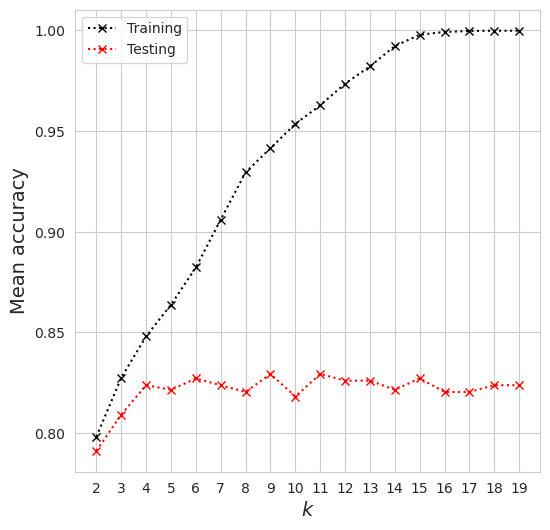

In [460]:
plt.figure(figsize=(6,6))
plt.plot(depth, train, ':xk', label='Training')
plt.plot(depth, test, ':xr', label='Testing')
plt.ylabel('Mean accuracy', fontsize=14)
plt.xlabel('$k$',fontsize=14)
plt.xticks(depth)
plt.legend()
plt.show()

In [461]:
rfc = RFC(max_depth = 13)
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)

0.9831649831649831

In [462]:
rfc.feature_importances_

array([0.17708409, 0.08975912, 0.2644612 , 0.17174464, 0.04721065,
       0.03421542, 0.18510464, 0.03042024])

### Here are the model's final predictions on survival of passengers

In [463]:
y_final_predictions = predict1
y_final_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Placing the predictions in the gender_submission-like file as requested. At the end of the day, the first model I created had the highest accuracy.

In [464]:
gender_submission

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [465]:
gender_submission['Survived'] = y_final_predictions
Titanic_submission = gender_submission
Titanic_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [466]:
Titanic_submission.to_csv('data/Titanic_submission.csv', sep=',', index=False, encoding='utf-8')

# Accuracy From Kaggle:

"Score: 0.78708


Your score represents your submission's accuracy. For example, a score of 0.7 in this competition indicates you predicted Titanic survival correctly for 70% of people."

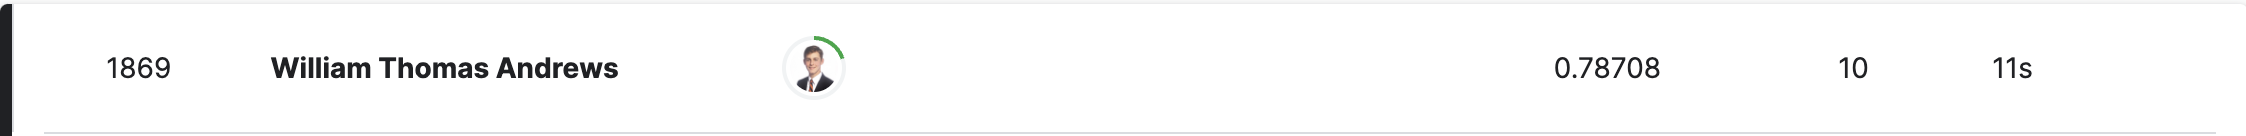